In [3]:
# Run only once
# !pip install pyarrow

     |████████████████████████████████| 40.8 MB 67 kB/s  eta 0:00:01


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
nyc_taxi_jan = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet")
nyc_taxi_feb = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet")

In [4]:
# Question 1. Downloading the data (1 point)
## Shape of Yellow Taxi -Jan
nyc_taxi_jan.shape

(3066766, 19)

In [5]:
nyc_taxi_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [6]:
nyc_taxi_jan.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [7]:
# Question 2. What's the standard deviation of the trips duration in January?
nyc_taxi_jan['duration'] = nyc_taxi_jan['tpep_dropoff_datetime'] - nyc_taxi_jan['tpep_pickup_datetime'] 
nyc_taxi_jan['duration'] = nyc_taxi_jan['duration'].apply(lambda td: td.total_seconds()/60)
nyc_taxi_jan.duration.describe()

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64

In [8]:
# Question 3. What fraction of the records left after you dropped the outliers?
nyc_taxi_jan2 = nyc_taxi_jan[(nyc_taxi_jan.duration >=1.0) & (nyc_taxi_jan.duration <=60.0)]
print(f"Fraction of rows left: {round(nyc_taxi_jan2.shape[0]/nyc_taxi_jan.shape[0] * 100,1)}")

Fraction of rows left: 98.1


In [9]:
## Question 4. What's the dimensionality of this matrix (number of columns)?
cols = ['PULocationID', 'DOLocationID']
nyc_taxi_jan2[cols] = nyc_taxi_jan2[cols].astype(str)

/tmp/ipykernel_9844/2067477250.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_taxi_jan2[cols] = nyc_taxi_jan2[cols].astype(str)


In [10]:
train_feat_dict = nyc_taxi_jan2[cols].to_dict(orient = 'records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_feat_dict)
print(f"The dimensionality of feature matrix is:  {len(dv.feature_names_)}")

The dimensionality of feature matrix is:  515


In [11]:
target = 'duration'
y_train = nyc_taxi_jan2[target].values

In [12]:
# Question 5. What's the RMSE on train?
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

print(f"The RMSE o train is: {mean_squared_error(y_train, y_pred, squared= False)}")

The RMSE o train is: 7.6492610279057605


/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


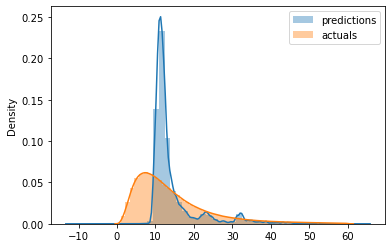

In [14]:
## Looking the predictions and actuals visually
sns.distplot(y_pred, label = 'predictions')
sns.distplot(y_train, label = 'actuals')

plt.legend()

## Run only this part - Cleaned with Functions

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
## Creating a function for convenience of reading train and validations
def read_data(file_path: str) -> pd.DataFrame:
    df = pd.read_parquet(file_path)

    df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'] 
    df['duration'] = df['duration'].apply(lambda td: td.total_seconds()/60)

    df = df[(df.duration >=1.0) & (df.duration <=60.0)]

    cols = ['PULocationID', 'DOLocationID']
    df[cols] = df[cols].astype(str)
    
    return df 

df_train = read_data("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet")
df_val = read_data("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet")

In [4]:
print(f"The shape of January data is: {df_train.shape}")
print(f"The shape of Februaury data is: {df_val.shape}")

The shape of January data is: (3009173, 20)
The shape of Februaury data is: (2855951, 20)


In [9]:
## Data pre-processing for feature extraction
cols = ['PULocationID', 'DOLocationID']

dv = DictVectorizer()

train_feat_dict = df_train[cols].to_dict(orient = 'records')
X_train = dv.fit_transform(train_feat_dict)

val_feat_dict = df_val[cols].to_dict(orient = 'records')
X_val = dv.transform(val_feat_dict)

In [10]:
## Setting up train and validations of target variable
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [11]:
## Model training
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

print(f"The RMSE o train is: {mean_squared_error(y_val, y_pred, squared= False)}")

The RMSE o train is: 7.81183265470218
